In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
f = uproot.open("../input_files/bdt_convert_superunified_bnb_ncpi0_full_spacepoints.root")

f["wcpselection"]["T_KINEvars"].items()

[('kine_reco_Enu', <TBranch 'kine_reco_Enu' at 0x00013ed9b610>),
 ('kine_reco_add_energy', <TBranch 'kine_reco_add_energy' at 0x00013ed9be50>),
 ('kine_energy_particle',
  <TBranchElement 'kine_energy_particle' at 0x00013ede8640>),
 ('kine_energy_info', <TBranchElement 'kine_energy_info' at 0x00013ede8f40>),
 ('kine_particle_type',
  <TBranchElement 'kine_particle_type' at 0x00013ede98a0>),
 ('kine_energy_included',
  <TBranchElement 'kine_energy_included' at 0x00013edea200>),
 ('kine_pio_mass', <TBranch 'kine_pio_mass' at 0x00013edeab60>),
 ('kine_pio_flag', <TBranch 'kine_pio_flag' at 0x00013edeb370>),
 ('kine_pio_vtx_dis', <TBranch 'kine_pio_vtx_dis' at 0x00013edebb20>),
 ('kine_pio_energy_1', <TBranch 'kine_pio_energy_1' at 0x00013ee00310>),
 ('kine_pio_theta_1', <TBranch 'kine_pio_theta_1' at 0x00013ee00ac0>),
 ('kine_pio_phi_1', <TBranch 'kine_pio_phi_1' at 0x00013ee01270>),
 ('kine_pio_dis_1', <TBranch 'kine_pio_dis_1' at 0x00013ee01a20>),
 ('kine_pio_energy_2', <TBranch 'kine_p

In [3]:
pf_eval_df = f["wcpselection"]["T_PFeval"].arrays(["reco_pdg", "reco_startMomentum"], library="pd")
kine_df = f["wcpselection"]["T_KINEvars"].arrays(["kine_pio_flag"], library="pd")
bdt_df = f["wcpselection"]["T_BDTvars"].arrays(["shw_sp_n_20mev_showers"], library="pd")

all_df = pd.concat([pf_eval_df, kine_df, bdt_df], axis=1)

all_df


,reco_pdg,reco_startMomentum,kine_pio_flag,shw_sp_n_20mev_showers
0,"[13, 2212, 13, 2212, 211, 11, 11, 11, 211, 11,...","[[0.07646198570728302, 0.014857529662549496, 0...",1,0.0
1,[],[],-1,-1.0
2,"[2212, 11, 11, 11, 11, 111, 22, 22, 22]","[[0.1153734028339386, -0.1094355583190918, 0.3...",1,2.0
3,"[11, 11, 11, 211, 11, 111, 22, 22, 2112, 22]","[[0.01439483743160963, 0.08740651607513428, 0....",1,3.0
4,"[2212, 11, 11, 11, 2212, 2212, 2212, 22, 22, 2...","[[-0.284869909286499, 0.03589856997132301, 0.2...",1,2.0
...,...,...,...,...
11930,[],[],-1,-1.0
11931,[],[],-1,-1.0
11932,"[2212, 11, 11, 11, 11, 11, 211, 11, 111, 22, 2...","[[0.2706429362297058, 0.34403902292251587, 0.9...",1,3.0
11933,[],[],-1,-1.0


In [4]:
reco_pdgs = all_df["reco_pdg"].to_numpy()
reco_energy = all_df["reco_startMomentum"].to_numpy()

reco_shower_counts = []
reco_electron_counts = []
reco_photon_counts = []

for i in tqdm(range(len(reco_pdgs))):

    curr_reco_pdgs = reco_pdgs[i]
    curr_reco_energy = reco_energy[i]
    curr_reco_shower_count = 0
    curr_reco_electron_count = 0
    curr_reco_photon_count = 0

    if len(curr_reco_pdgs) == 0:
        reco_electron_counts.append(-999)
        reco_photon_counts.append(-999)
        reco_shower_counts.append(-999)
        continue

    for j in range(len(curr_reco_pdgs)):
        pdg = curr_reco_pdgs[j]
        if pdg == 22: # photon
            if curr_reco_energy[j][3] > .02:
                curr_reco_photon_count += 1
        if pdg == 11: # electron
            if curr_reco_energy[j][3] > .02:
                curr_reco_electron_count += 1
        if pdg == 22 or pdg == 11: # shower
            if curr_reco_energy[j][3] > .02:
                curr_reco_shower_count += 1

    reco_shower_counts.append(curr_reco_shower_count)
    reco_electron_counts.append(curr_reco_electron_count)
    reco_photon_counts.append(curr_reco_photon_count)

all_df["reco_20MeV_showers"] = reco_shower_counts
all_df["reco_20MeV_electrons"] = reco_electron_counts
all_df["reco_20MeV_photons"] = reco_photon_counts



  0%|          | 0/11935 [00:00<?, ?it/s]

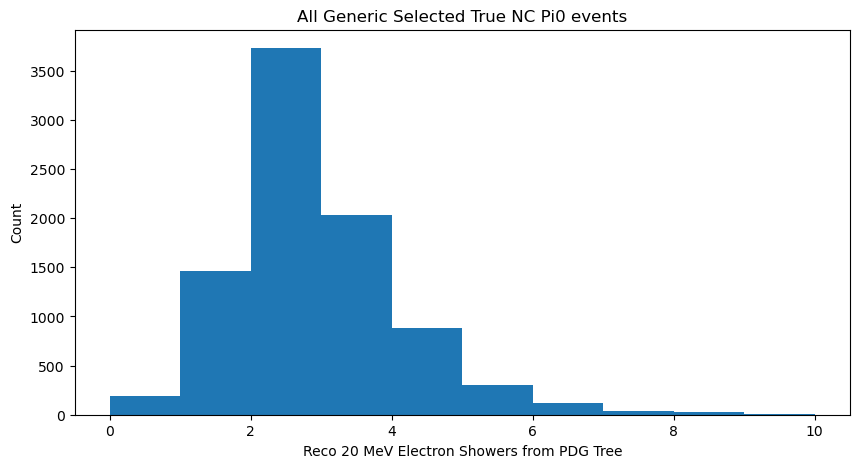

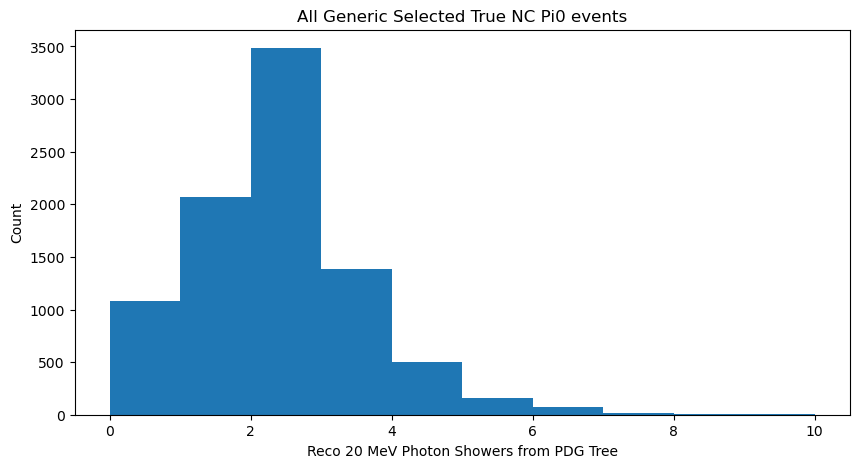

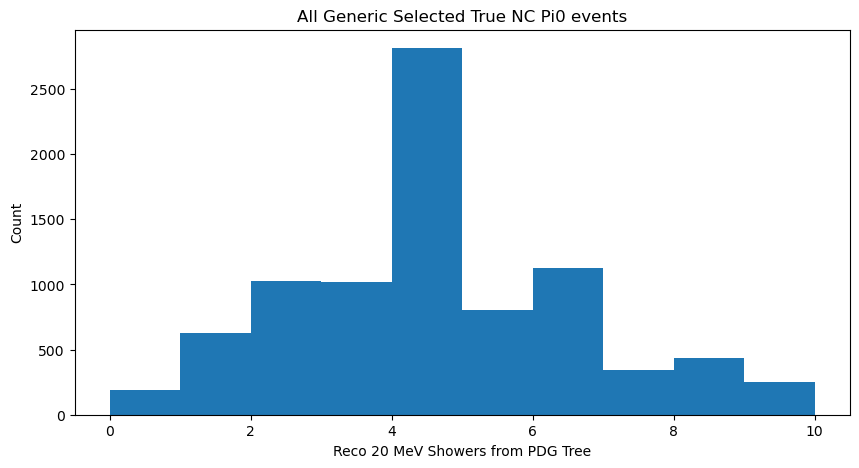

In [5]:

plt.figure(figsize=(10, 5))
plt.hist(all_df["reco_20MeV_electrons"], bins=np.linspace(0, 10, 11))
plt.xlabel("Reco 20 MeV Electron Showers from PDG Tree")
plt.ylabel("Count")
plt.title("All Generic Selected True NC Pi0 events")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(all_df["reco_20MeV_photons"], bins=np.linspace(0, 10, 11))
plt.xlabel("Reco 20 MeV Photon Showers from PDG Tree")
plt.ylabel("Count")
plt.title("All Generic Selected True NC Pi0 events")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(all_df["reco_20MeV_showers"], bins=np.linspace(0, 10, 11))
plt.xlabel("Reco 20 MeV Showers from PDG Tree")
plt.ylabel("Count")
plt.title("All Generic Selected True NC Pi0 events")
plt.show()


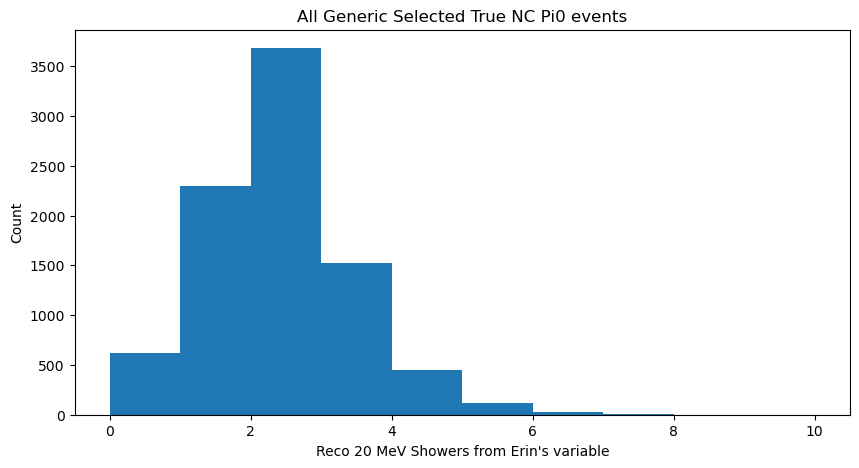

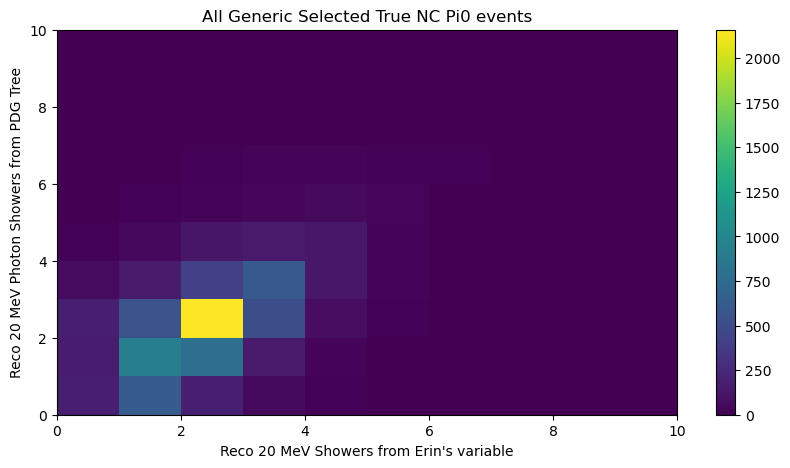

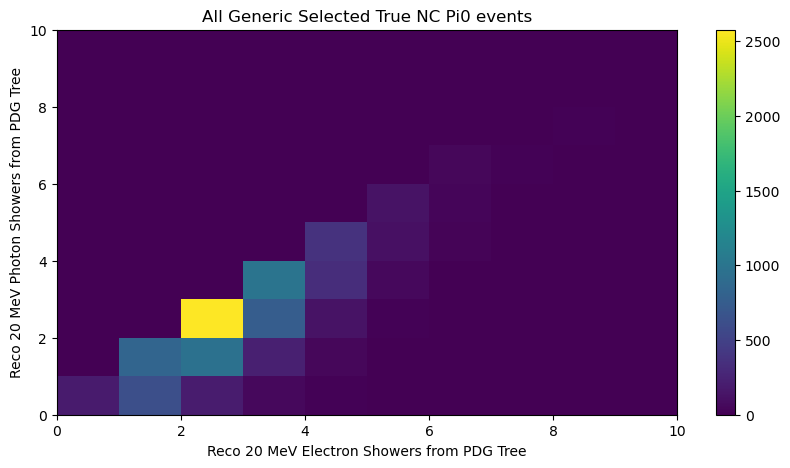

In [6]:

plt.figure(figsize=(10, 5))
plt.hist(all_df["shw_sp_n_20mev_showers"], bins=np.linspace(0, 10, 11))
plt.xlabel("Reco 20 MeV Showers from Erin's variable")
plt.ylabel("Count")
plt.title("All Generic Selected True NC Pi0 events")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist2d(all_df["shw_sp_n_20mev_showers"], all_df["reco_20MeV_photons"], bins=(np.linspace(0, 10, 11), np.linspace(0, 10, 11)))
plt.xlabel("Reco 20 MeV Showers from Erin's variable")
plt.ylabel("Reco 20 MeV Photon Showers from PDG Tree")
plt.colorbar()
plt.title("All Generic Selected True NC Pi0 events")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist2d(all_df["reco_20MeV_electrons"], all_df["reco_20MeV_photons"], bins=(np.linspace(0, 10, 11), np.linspace(0, 10, 11)))
plt.xlabel("Reco 20 MeV Electron Showers from PDG Tree")
plt.ylabel("Reco 20 MeV Photon Showers from PDG Tree")
plt.colorbar()
plt.title("All Generic Selected True NC Pi0 events")
plt.show()



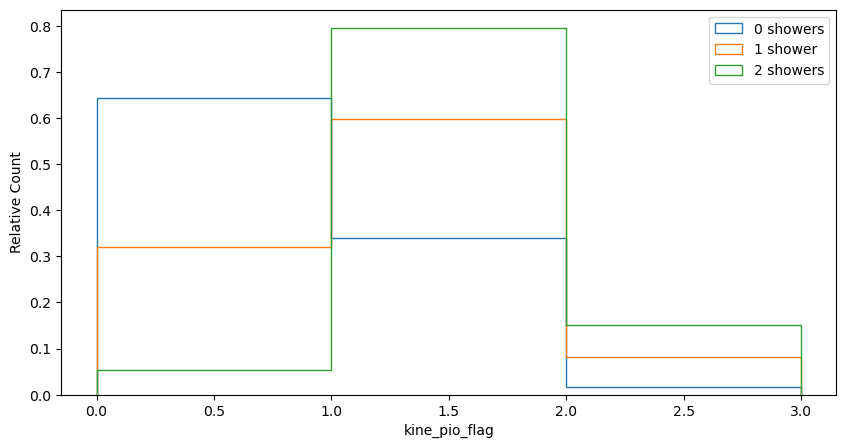

In [7]:
zero_shower_df = all_df[all_df["reco_20MeV_photons"] == 0]
zero_shower_df = zero_shower_df.query("reco_20MeV_photons == 0")
one_shower_df = all_df[all_df["reco_20MeV_photons"] == 1]
two_shower_df = all_df[all_df["reco_20MeV_photons"] == 2]

plt.figure(figsize=(10, 5))
plt.hist(zero_shower_df["kine_pio_flag"], bins=np.linspace(0, 3, 4), histtype="step", label="0 showers", density=True)
plt.hist(one_shower_df["kine_pio_flag"], bins=np.linspace(0, 3, 4), histtype="step", label="1 shower", density=True)
plt.hist(two_shower_df["kine_pio_flag"], bins=np.linspace(0, 3, 4), histtype="step", label="2 showers", density=True)
plt.xlabel("kine_pio_flag") 
plt.ylabel("Relative Count")
plt.legend()
plt.show()


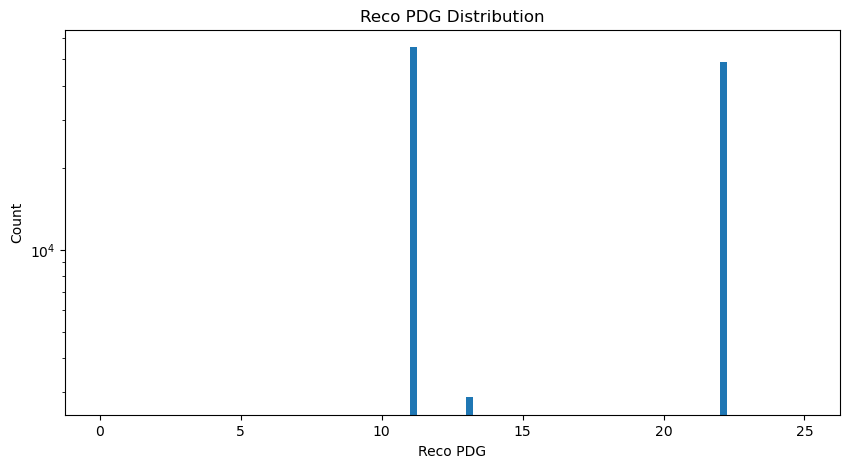

In [8]:
reco_pdgs = all_df["reco_pdg"].to_numpy()
reco_pdgs

all_reco_pdgs = []
for arr in reco_pdgs:
    all_reco_pdgs += list(arr)

plt.figure(figsize=(10, 5))
plt.hist(all_reco_pdgs, bins=100, range=(0, 25))
plt.xlabel("Reco PDG")
plt.ylabel("Count")
plt.title("Reco PDG Distribution")
plt.yscale("log")
plt.show()
